The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

### medv
median value of owner-occupied homes in \$1000s.

### crim
per capita crime rate by town.

### zn
proportion of residential land zoned for lots over 25,000 sq.ft.

### indus
proportion of non-retail business acres per town.

### chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

### nox
nitrogen oxides concentration (parts per 10 million).

### rm
average number of rooms per dwelling.

### age
proportion of owner-occupied units built prior to 1940.

### dis
weighted mean of distances to five Boston employment centres.

### rad
index of accessibility to radial highways.

### tax
full-value property-tax rate per \$10,000.

### ptratio
pupil-teacher ratio by town.

### black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

### lstat
lower status of the population (percent).



# Assumptions of model
- Relationship between IVs and DV is Linear
- Regression residuals must be normally distributed.
- No Autocorrelation of the residuals.
- The residuals are homoscedastic and approximately rectangular-shaped.
- No Multicolinearity

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Setting up dataframe

In [2]:
housing_df = pd.read_csv(r"F:\Datasets\boston housing\Boston.csv")

In [3]:
housing_df.head()

,medv,crime rate,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
ALLIVs = housing_df.drop(["medv"], axis=1)
DV = housing_df[["medv"]]

In [5]:
IVs_new = ALLIVs
IVs_new = IVs_new.drop(["rad"], axis=1)

# Testing for correlations between IVs/DV and Multicolinearity

,crime rate,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
crime rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
ptratio,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


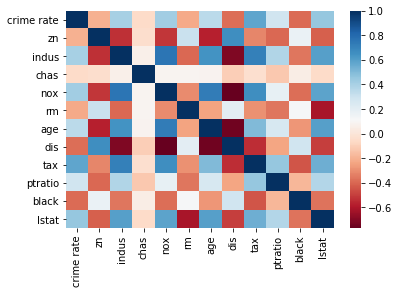

In [6]:
corr = IVs_new.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [7]:
IVsWithConstant = sm.tools.add_constant(IVs_new)
series = pd.Series([variance_inflation_factor(IVsWithConstant.values, i) for i in range(IVsWithConstant.shape[1])], index=IVsWithConstant.columns)
series

const         537.858634
crime rate      1.664471
zn              2.273018
indus           3.682265
chas            1.061561
nox             4.304929
rm              1.885425
age             3.083009
dis             3.954951
tax             3.415289
ptratio         1.734873
black           1.341459
lstat           2.937752
dtype: float64

# creating the model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(IVs_new, DV, test_size=0.20, random_state=1)

In [9]:
model = linear_model.LinearRegression()
model.fit(IVs_new, DV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([[-6.75402666e-02,  3.97197489e-02, -5.84105438e-02,
         3.11437328e+00, -1.52617980e+01,  4.11460978e+00,
        -3.92675788e-03, -1.49015338e+00,  1.33416156e-03,
        -8.38735590e-01,  8.41505674e-03, -5.16417966e-01]])

In [11]:
model.intercept_


array([29.75938214])

In [12]:
y_predict = model.predict(X_test)

In [13]:
 X_test

,crime rate,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,222,18.4,396.90,7.53
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,370,17.6,396.90,7.18
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,233,17.9,392.74,18.80
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,345,18.9,396.21,8.10
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,666,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,270,18.2,395.01,8.16
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,307,17.4,385.05,4.14
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,384,20.9,393.49,13.00
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,666,20.2,24.65,15.69


In [14]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [15]:
y_test_array = np.array(y_test)

In [18]:
def AccuracyEvaluation():
    
    withinTen = 0
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.9) and (y_predict[i] < y_test_array[i] * 1.1):
            withinTen += 1
            
    withinTwenty = 0    
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.8) and (y_predict[i] < y_test_array[i] * 1.2):
            withinTwenty += 1
            
    withinThirty = 0
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.7) and (y_predict[i] < y_test_array[i] * 1.3):
            withinThirty += 1
            
    print("We will now count the number of predictions within a certain range of the actual value.")        
    print("{:.4}% of the predictions are are within 10% of the actual value".format( 100 * (withinTen / len(y_test_array)) ))
    print("{:.4}% of the predictions are are within 20% of the actual value".format( 100 * (withinTwenty / len(y_test_array)) ))
    print("{:.4}% of the predictions are are within 30% of the actual value".format( 100 * (withinThirty / len(y_test_array)) ))


In [19]:
AccuracyEvaluation()

We will now count the number of predictions within a certain range of the actual value.
36.27% of the predictions are are within 10% of the actual value
64.71% of the predictions are are within 20% of the actual value
81.37% of the predictions are are within 30% of the actual value


# Todo
1. Add explanations for steps
2. Show how/if model fits assumptions 2-4 
3. Mention insights
4. Explain why i dropped the feature i dropped